# Projeto 7
## projeto da aula de análise de dados

In [1]:
%pip install -q -U wartermark

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wartermark (from versions: none)
ERROR: No matching distribution found for wartermark


In [2]:
# Importando as bibliotecas necessárias #
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
%reload_ext watermark
%watermark -a "Italo Gonçalves"

Author: Italo Gonçalves



In [4]:
# carregando os dados #
df = pd.read_csv('C:\\Users\\Italo\\Documents\\Projeto 7\\dataset.csv')

In [5]:
# verificando os dados #
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222167,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# verificando as colunas do dataset e se exite valores ausentes #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# verificando se existe valores com o caractere "?" no dataset #
df.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# verificando valores únicos para cada coluna do dataset para temos certeza de que não tem outros caracteres especiais nos dados #:
for col in list(df.columns):
    # Obtendo os valores únicos de cada coluna
    unique_values = df[col].unique()

    # Se o número de valores únicos for menor que 20, imprima os valores
    # Caso contrário, imprima o número de valores exclusivos
    if len(unique_values) < 20:
        print("\n")
        print(f"Valores únicos em {col}: {unique_values}")
    else:
        print("\n")
        print(f"Número de valores únicos em {col}: {len(unique_values)}")



Número de valores únicos em encounter_id: 101766


Número de valores únicos em patient_nbr: 71518


Valores únicos em race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


Valores únicos em gender: ['Female' 'Male' 'Unknown/Invalid']


Valores únicos em age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


Valores únicos em weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


Valores únicos em admission_type_id: [6 1 2 3 4 5 8 7]


Número de valores únicos em discharge_disposition_id: 26


Valores únicos em admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


Valores únicos em time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


Valores únicos em payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


Número de valores únicos em medical_specialty: 73


Número de valores ú

In [10]:
# Verificando qual a porcentagem de valores com o caractere "?" em cada coluna do dataset #:
for col in df.columns:
    if df[col].dtype == 'object':
     if df[col][df[col] == '?'].count() > 0:
        print('\nColuna', col, 'tem', df[col][df[col] == '?'].count(), 'valores com o caractere "?"')
        print('Porcentagem:', round(df[col][df[col] == '?'].count() / df[col].count() * 100, 2), '%')


Coluna race tem 2273 valores com o caractere "?"
Porcentagem: 2.23 %

Coluna weight tem 98569 valores com o caractere "?"
Porcentagem: 96.86 %

Coluna payer_code tem 40256 valores com o caractere "?"
Porcentagem: 39.56 %

Coluna medical_specialty tem 49949 valores com o caractere "?"
Porcentagem: 49.08 %

Coluna diag_1 tem 21 valores com o caractere "?"
Porcentagem: 0.02 %

Coluna diag_2 tem 358 valores com o caractere "?"
Porcentagem: 0.35 %

Coluna diag_3 tem 1423 valores com o caractere "?"
Porcentagem: 1.4 %


In [11]:
# analisando a coluna gender também, pois existe um valor que precisa ser tratado #
print('\nColuna gender tem', df['gender'][df['gender'] == 'Unknown/Invalid'].count(), 'valores com Unknown/Invalid')
print('Isso representa', round(df['gender'][df['gender'] == 'Unknow/Invalid'].count() / len(df.index) * 100, 2), '% dos dados')


Coluna gender tem 3 valores com Unknown/Invalid
Isso representa 0.0 % dos dados


In [12]:
# Excluido as colunas com valores ausentes maior que 30% do dataset #
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)


In [13]:
# Excluindo os valores com o caractere "?" e também os valores com informação Unknown/Invalid na coluna gender #
df = df[(df['race'] != '?') & 
		(df['diag_1'] != '?') & 
		(df['diag_2'] != '?') & 
		(df['diag_3'] != '?') & 
		(df['gender'] != 'Unknown/Invalid')]

In [14]:
# Verificando se ainda existe valores com o caractere "?" no dataset #:
df.isin(['?']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [15]:
df.shape

(98052, 47)

In [16]:
# Verificadondo se existe colunas com varriáveis constantes no dataset #:
for col in df.columns:
    if df[col].nunique() == 1:
        print('Coluna', col, 'é constante e será excluída')
        df = df.drop(col, axis=1)

Coluna examide é constante e será excluída
Coluna citoglipton é constante e será excluída
Coluna metformin-rosiglitazone é constante e será excluída


In [17]:
df.shape

(98052, 44)

In [18]:
# Calculando valores ausentes em cada coluna do dataset #:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print('Coluna', col, 'tem', df[col].isnull().sum(), 'valores ausentes')
        print('Porcentagem:', round(df[col].isnull().sum() / len(df.index) * 100, 2), '% dos dados')
        

Coluna max_glu_serum tem 92844 valores ausentes
Porcentagem: 94.69 % dos dados
Coluna A1Cresult tem 81859 valores ausentes
Porcentagem: 83.49 % dos dados


In [19]:
# Excluindo as colunas que tem valores ausentes #:
df = df.drop(['max_glu_serum', 'A1Cresult'], axis=1)
df.shape

(98052, 42)

### Ajustando a Variável Alvo Para Estratificação de Risco

Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições agora são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico. 

### Nossa variável alvo é 'readmiited'. Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:

-- < 30 (readmissão em menos de 30 dias)

-- > 30 (readmissão em mais de 30 dias)

-- No   (sem readmissão)

Nós podemos combinar a readmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [20]:
dados_clean = df.copy()

# Criando uma copia e caso necessario podemos voltar ao dada set original executando o comando abaixo #:
# df = dados_clean #

In [21]:
# Substituindo os valores de readmitted para 0 e 1 #:
df['readmitted'] = df['readmitted'].replace({'NO': 0, '<30': 1, '>30': 1})

In [22]:
# Verificando os valores únicos da coluna readmitted #:
df['readmitted'].unique()

array([1, 0], dtype=int64)

In [23]:
# Verificado o percentual de cada classe da coluna readmitted #:
df['readmitted'].value_counts(normalize=True) * 100

readmitted
0    53.37678
1    46.62322
Name: proportion, dtype: float64

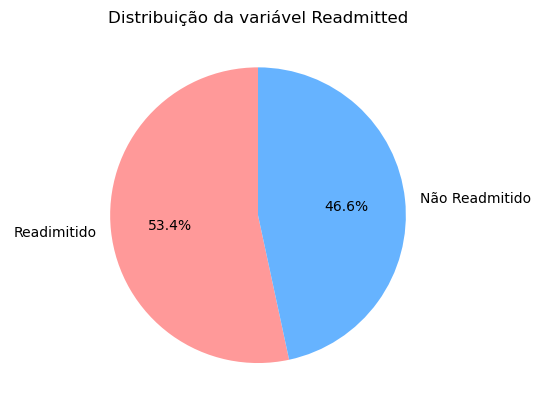

In [24]:
# Verificando de forma gráfica o percentual de cada classe da coluna readmitted #:
labels =['Readimitido', 'Não Readmitido']

sizes = df['readmitted'].value_counts(normalize=True) * 100

colors = ['#ff9999','#66b3ff']

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição da variável Readmitted')
plt.show()



## Recategoriazação de Variáveis

Como tratar a variável idade ?

In [25]:
# Verificando a quantidade de valores por categoria #
df.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

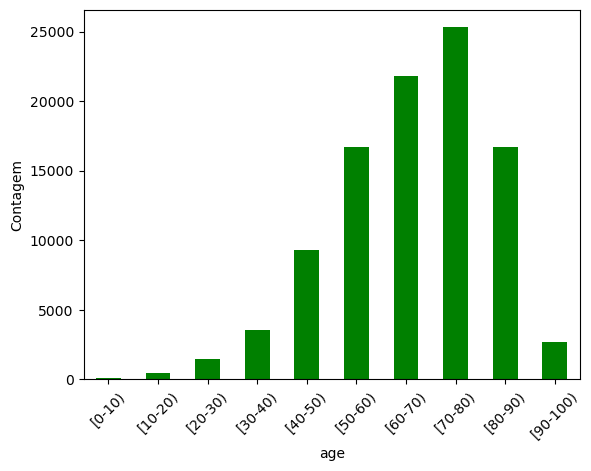

In [26]:
# Vamos verificar a variável que representa a faixa etária dos pacientes

# Agrupando os dados por idade e plotando o gráfico de barras
df.groupby('age').size().plot(kind = 'bar', color = 'green')

# Adicionando rótulo ao eixo y
plt.ylabel('Contagem')

# Rotacionando os rótulos do eixo x
plt.xticks(rotation = 45)

# Exibindo o gráfico
plt.show()

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos. 

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente. 

Podemos adotar duas abordagens:

1- Se queremos ver o efeito do aumento da idade na readmissão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria de idade. Por exemplo, se a categoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idade em pontos médios, resultando em uma variável numérica.


2- Podemos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade

#### Adotaremos a opção 2 pois altera menos a informação contida nos dados.

In [27]:
# Recategorizando a variável age para facilitar a visualização dos dados #:

# Reclassificando as idades de 0 a 50 anos em uma única categoria #
df['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
for val in df['age']], index = df.index)

# Reclassificando as idades de 80 a 100 anos em uma única categoria #
df['age'] = pd.Series(['[80-100)' if val in ['[70-80)', '[80-90)', '[90-100)'] else val
for val in df['age']], index = df.index)



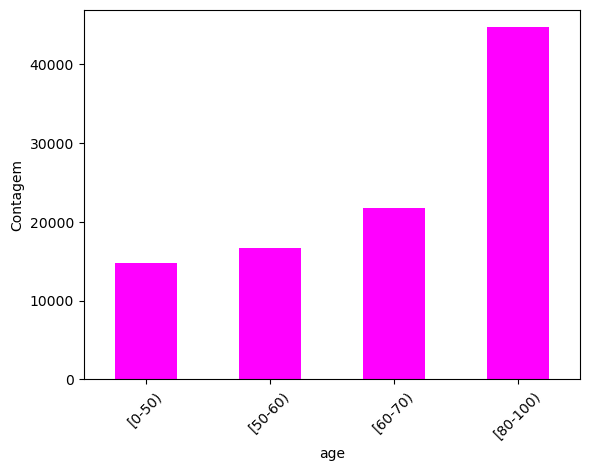

In [28]:
# Vamos verificar a variável que representa a faixa etária dos pacientes

# Agrupando os dados por idade e plotando o gráfico de barras
df.groupby('age').size().plot(kind = 'bar', color = 'magenta')

# Adicionando rótulo ao eixo y
plt.ylabel('Contagem')

# Rotacionando os rótulos do eixo x
plt.xticks(rotation = 45)

# Exibindo o gráfico
plt.show()

In [29]:
# Mudando a coluna admission_type para somente dois valores #:
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Outros' for val in df['admission_type_id']], index = df.index)

In [30]:
# Conferiando a quantidade de variaveis diferentes na coluna admission_type_id #:
df.admission_type_id.nunique()

2

In [31]:
# Calculando os valores por categoria na coluna admission_type_id #:
df.admission_type_id.value_counts(normalize=True) * 100 

admission_type_id
Emergency    53.214621
Outros       46.785379
Name: proportion, dtype: float64

In [32]:
# Mudando a coluna discarge_disposition_id para somente dois valores #:
df['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outros' for val in df['discharge_disposition_id']], index = df.index)

In [33]:
df.discharge_disposition_id.nunique()

2

In [34]:
df.discharge_disposition_id.value_counts(normalize=True) * 100 

discharge_disposition_id
Casa      58.753519
Outros    41.246481
Name: proportion, dtype: float64

In [ ]:
# Mudando a coluna admission_source_id para somente três valores #:
df['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro' 
                                              for val in df['admission_source_id']], index = df.index)

In [36]:
df.admission_source_id.value_counts(normalize=True) * 100
# Conferindo os valores únicos da coluna admission_source_id #:

admission_source_id
Sala_Emergencia    57.062579
Recomendacao       28.918329
Outro              14.019092
Name: proportion, dtype: float64